#### Problem Statement : Build a sentiment analysis model using Python and scikit-learn to classify movie reviews as positive or negative.

In [2]:
#Import all important libraries and packages
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
# nltk.download('stopwords')

In [59]:
import psutil

def check_memory():
    # Get the system memory information
    memory_info = psutil.virtual_memory()

    # Print the available memory in GB
    available_memory_gb = memory_info.available / (1024 ** 3)
    print(f"Available Memory: {available_memory_gb:.2f} GB")

# Call the function to check memory
check_memory()


Available Memory: 7.84 GB


In [4]:
#Reading csv data file
data = pd.read_csv(r'D:\Python\TextClassification\Data\IMDB Dataset.csv')

In [5]:
df = data.copy()  # Create a copy of the DataFrame to avoid future warnings SettingWithCopyWarning

In [6]:
# Tried with all the data first, however due to limited computational resources, needed to slice the data
df = df.iloc[:10000]

In [7]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

#### Let`s review and understand the data

In [8]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
df['sentiment'].value_counts()
#We have balanced data 

sentiment
positive    5028
negative    4972
Name: count, dtype: int64

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

17

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

#### Data Preprocessing 

    1. remove HTML tags
    2. remove stopwords
    3. lowercase

In [14]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [15]:
df['review'] = df['review'].apply(remove_tags)

In [16]:
df

review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. The filming tec...  positive
2     I thought this was a wonderful way to spend ti...  positive
3     Basically there's a family where a little boy ...  negative
4     Petter Mattei's "Love in the Time of Money" is...  positive
...                                                 ...       ...
9995  Fun, entertaining movie about WWII German spy ...  positive
9996  Give me a break. How can anyone say that this ...  negative
9997  This movie is a bad movie. But after watching ...  negative
9998  This is a movie that was probably made to ente...  negative
9999  Smashing film about film-making. Shows the int...  positive

[9983 rows x 2 columns]

In [17]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [18]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [19]:
import string
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_punctuation)

In [20]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

#### Split Data into train and test

In [21]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [22]:
X

review
0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production filming technique ...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
...                                                 ...
9995  fun entertaining movie wwii german spy julie a...
9996  give break anyone say good hockey movie know m...
9997  movie bad movie watching endless series bad ho...
9998  movie probably made entertain middle school ea...
9999  smashing film filmmaking shows intense strange...

[9983 rows x 1 columns]

In [23]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

As machine dont understand the textual format we will convert the sentiments into 0 and 1 using label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [25]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [26]:
y.shape

(9983,)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
X_train.shape

(7986, 1)

#### Count Vectorizer Feature Extraction

In [29]:
#Lets apply Count Vectorization 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()

In [31]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

#### Model Building  and Model Evaluation

Naive Baye`s Model 

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test_bow)

In [34]:
#Create a function to evaluate models for future use
def evaluate_model(y_test, y_pred):
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall:.4f}")

    # F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

# Example usage
evaluate_model(y_test, y_pred)

Accuracy: 0.6565
Precision: 0.6643
Recall: 0.6565
F1-score: 0.6552

Confusion Matrix:
[[697 255]
 [431 614]]


------------------------------------------------------------------------------------------------------------------------------

Lets try some other techniques as well as fine tune the model

------------------------------------------------------------------------------------------------------------------------------

#### Lets take  max_features=3000, frequent 3000 words from our corpus to improve the accuracy

In [35]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)

In [36]:
evaluate_model(y_test, y_pred)

Accuracy: 0.8353
Precision: 0.8361
Recall: 0.8353
F1-score: 0.8353

Confusion Matrix:
[[808 144]
 [185 860]]


#### Lets take  max_features=5000, frequent 5000 words from our corpus and try with bi-grams

In [37]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)


In [38]:
evaluate_model(y_test, y_pred)

Accuracy: 0.8423
Precision: 0.8426
Recall: 0.8423
F1-score: 0.8423

Confusion Matrix:
[[806 146]
 [169 876]]


#### Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)


In [40]:
evaluate_model(y_test, y_pred)

Accuracy: 0.8302
Precision: 0.8306
Recall: 0.8302
F1-score: 0.8303

Confusion Matrix:
[[793 159]
 [180 865]]


## S V M 

In [61]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_bow,y_train)

y_pred = svm_model.predict(X_test_bow)

In [62]:
evaluate_model(y_test, y_pred)

Accuracy: 0.8282
Precision: 0.8286
Recall: 0.8282
F1-score: 0.8283

Confusion Matrix:
[[792 160]
 [183 862]]


## Using Tf-Idf

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf = TfidfVectorizer()

In [43]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [44]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)


In [45]:
evaluate_model(y_test, y_pred)

Accuracy: 0.8493
Precision: 0.8498
Recall: 0.8493
F1-score: 0.8493

Confusion Matrix:
[[816 136]
 [165 880]]


## ADDITIONAL : EDA FOR REFERENCE 

In [46]:
# !pip install wordcloud

In [47]:
text_data = " ".join(review for review in df['review'])

In [48]:
# As the data in columns is pandas series, to make the visulization we need to convert it to simple text or string
text_data

'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

In [49]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

Lets create a word cloud to see which words are most frequently used for movie reviews

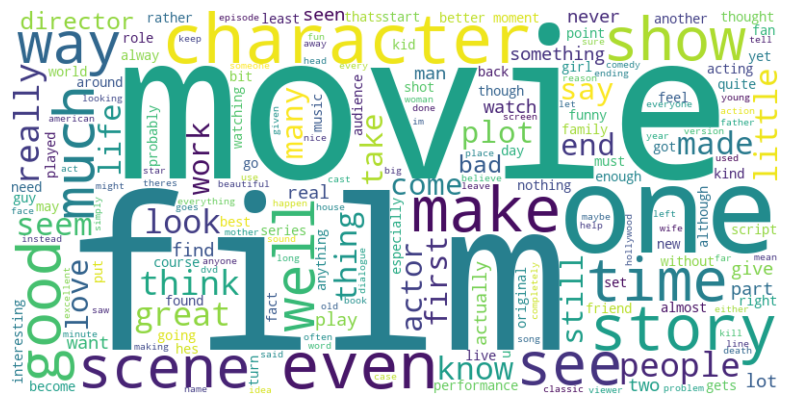

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

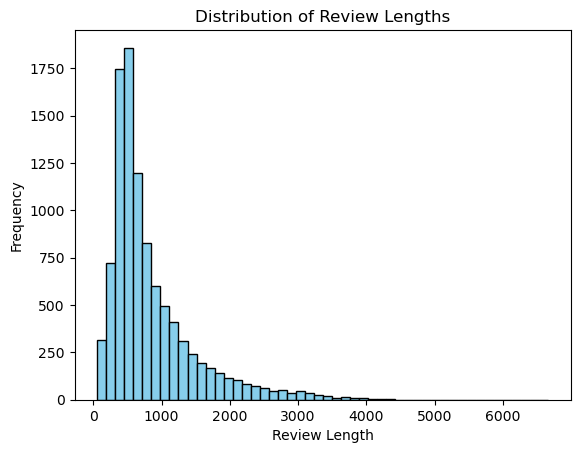

In [51]:
df['review_length'] = df['review'].apply(len)

plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [52]:
from collections import Counter
from nltk.tokenize import word_tokenize

words = word_tokenize(text_data)
word_counts = Counter(words)
# word_counts

In [53]:
top_words = word_counts.most_common(15)
top_words

[('movie', 16812),
 ('film', 14551),
 ('one', 9918),
 ('like', 7810),
 ('good', 5756),
 ('would', 4960),
 ('even', 4843),
 ('time', 4585),
 ('see', 4427),
 ('really', 4413),
 ('story', 4403),
 ('it', 4233),
 ('much', 3755),
 ('well', 3734),
 ('get', 3703)]

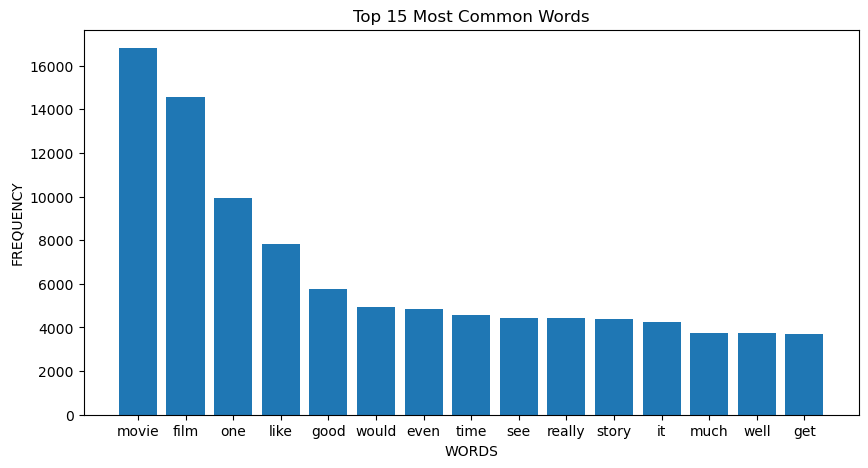

In [54]:
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in top_words], [count[1] for count in top_words])
plt.title('Top 15 Most Common Words')

plt.xlabel('WORDS')
plt.ylabel('FREQUENCY')
plt.show()

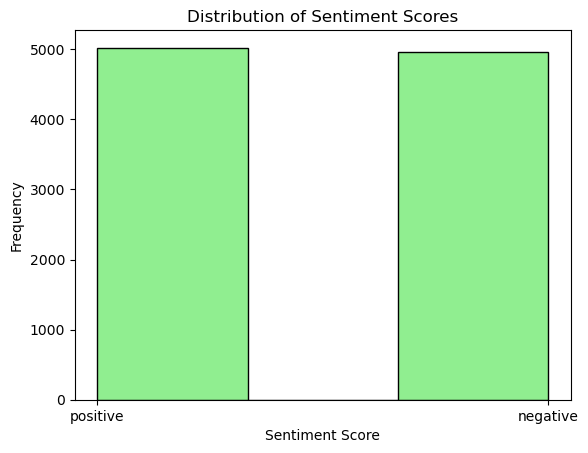

In [55]:
# Sentiment Analysis Distribution:
plt.hist(df['sentiment'], bins=3, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

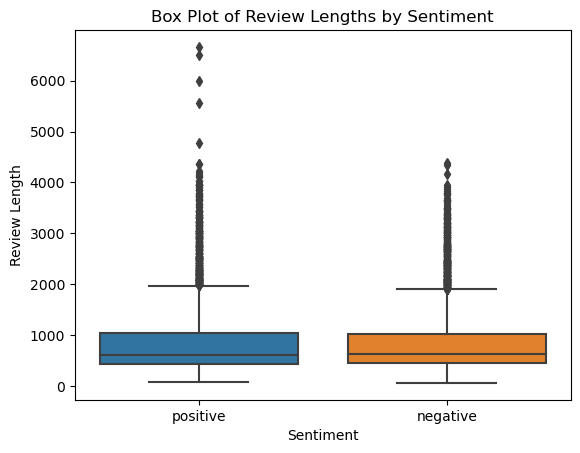

In [56]:
import seaborn as sns

sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Box Plot of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()
